In [2]:
!nvidia-smi

Fri Mar  1 23:19:46 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 36%   42C    P8     1W /  38W |    390MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:05:00.0 Off |                  N/A |
|  0%   

In [3]:
import pandas as pd 
import tensorflow as tf 
from keras.layers import Input, Dense 
from keras.models import Model 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 

In [10]:
data_path = 'ambient_temperature_system_failure.csv'

data = pd.read_csv(data_path)
data.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [13]:
# Exclude datetime column
data_values = data.drop('timestamp',
                       axis=1).values

print(data_values.shape)
data_values

(7267, 1)


array([[69.88083514],
       [71.22022706],
       [70.87780496],
       ...,
       [72.04656545],
       [71.82522648],
       [72.58408858]])

In [14]:
# Convert data to float type
data_values =data_values.astype('float32')
data_values

array([[69.88084 ],
       [71.22023 ],
       [70.87781 ],
       ...,
       [72.04656 ],
       [71.825226],
       [72.58409 ]], dtype=float32)

In [17]:
# Create new dataframe with converted values
data_converted = pd.DataFrame(data_values,
                             columns = data.columns[1:])
# Add back datetime column
data_converted.insert(0,'timestamp',
                     data['timestamp'])

data_converted.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880836
1,2013-07-04 01:00:00,71.220230
2,2013-07-04 02:00:00,70.877808
3,2013-07-04 03:00:00,68.959396
4,2013-07-04 04:00:00,69.283554


In [18]:
# Remove null
data_converted = data_converted.dropna()

In [20]:
# Exclude datetime column again
data_tensor = tf.convert_to_tensor(data_converted.drop(
    'timestamp',axis=1).values,dtype=tf.float32
)

print('data_tensor.shape',data_tensor.shape)

data_tensor.shape (7267, 1)


2024-03-01 23:38:55.694080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:38:55.694329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:38:55.716271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:38:55.716443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:38:55.716544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [26]:
# Define the autoencoder model
input_dim = 1
encoding_dim = 10

# Define model
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim,activation='relu')(input_layer)
decoder = Dense(input_dim,activation='relu')(encoder)
autoencoder = Model(inputs=input_layer,
                   outputs=decoder)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile and fit the model
autoencoder.compile(optimizer='adam',
                   loss='mse',)

In [28]:
# Train model
autoencoder.fit(data_tensor,data_tensor,epochs=50,
               batch_size=32,shuffle=True)

Epoch 1/50
228/228 [==============================] - 1s 849us/step - loss: 1432.5026
Epoch 2/50
  1/228 [..............................] - ETA: 0s - loss: 111.0419

2024-03-01 23:48:31.755532: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


228/228 [==============================] - 0s 1ms/step - loss: 17.9791
Epoch 3/50
228/228 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4/50
228/228 [==============================] - 0s 720us/step - loss: 0.0013
Epoch 5/50
228/228 [==============================] - 0s 994us/step - loss: 0.0013
Epoch 6/50
228/228 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7/50
228/228 [==============================] - 0s 619us/step - loss: 0.0013
Epoch 8/50
228/228 [==============================] - 0s 900us/step - loss: 0.0013
Epoch 9/50
228/228 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 10/50
228/228 [==============================] - 0s 597us/step - loss: 0.0013
Epoch 11/50
228/228 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/50
228/228 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/50
228/228 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 14/50
228/228 [===

In [95]:
# Calculate the reconstruction error for each data point
reconstructions = autoencoder.predict(data_tensor)

mse = tf.reduce_mean(tf.square(data_tensor - reconstructions),axis=1)

anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data_converted.index

threshold = anomaly_scores.quantile(0.95) 

print('min_score',anomaly_scores.min())
print('max_score',anomaly_scores.max())
print('threshold',threshold)

min_score 0.0
max_score 0.007187281
threshold 0.002095126546919346


In [96]:
anomalous = anomaly_scores > threshold 

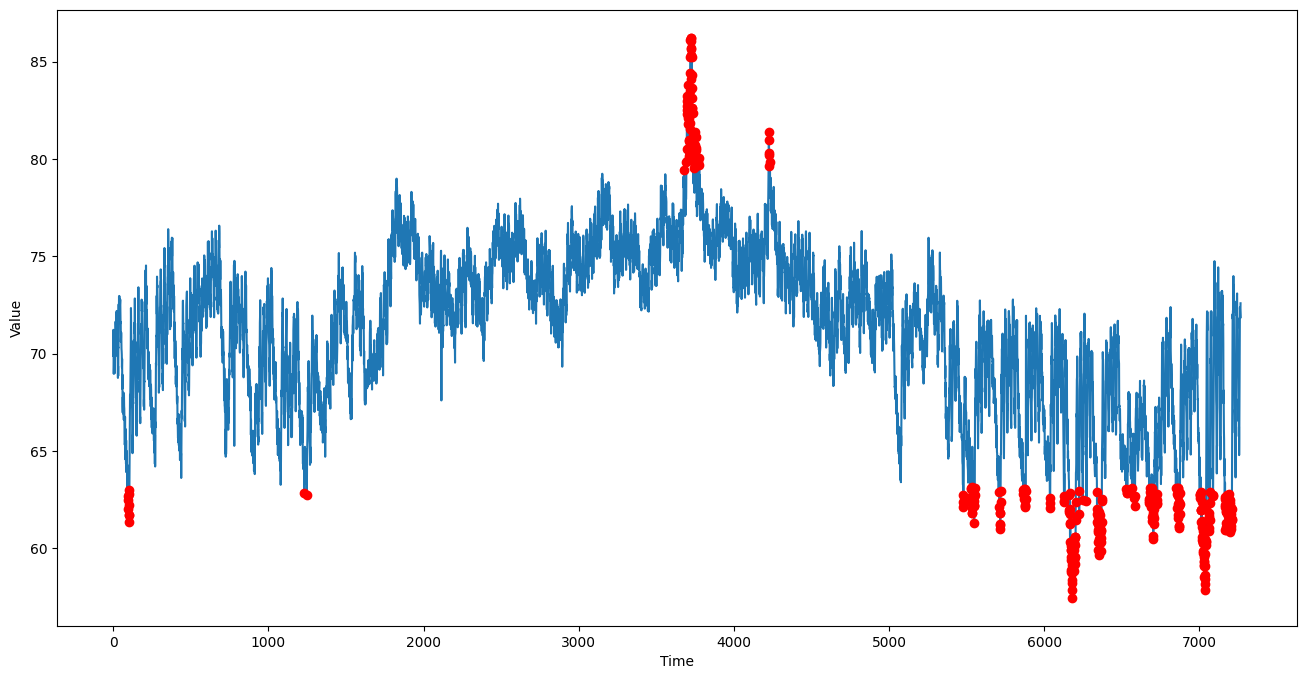

In [97]:
plt.figure(figsize=(16, 8)) 
plt.plot(data_converted['value'])
plt.plot(data_converted['value'][anomalous],'ro')
plt.xlabel('Time') 
plt.ylabel('Value') 
plt.show() 